In [1]:
# package to clean text
import nltk; nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re

# packages to store and manipulate data
import numpy as np
import pandas as pd
from pprint import pprint

# gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# spacy for lemmatization
import spacy
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\607791\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Import Dataset
df = pd.read_csv('C:/Users/607791/Desktop/DS/Practicum/billboard_lyrics_1964-2015.csv')
df.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,NaN,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


In [3]:
df.shape

(5100, 6)

In [4]:
df=df.drop(['Source'], axis=1)
df=df.dropna()
df.shape

(4866, 5)

In [5]:
df.head()

,Rank,Song,Artist,Year,Lyrics
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...


In [6]:
# clean text function
def clean_text(docs):
    # remove punctuation and numbers
    print('removing punctuation and digits')
    table = str.maketrans({key: None for key in string.punctuation + string.digits})
    clean_docs = [d.translate(table) for d in docs]
    
    print('spacy nlp...')
    nlp_docs = [nlp(d) for d in clean_docs]
    
    # pronouns stay, rest lemmatized
    print('getting lemmas')
    lemmatized_docs = [[w.lemma_ if w.lemma_ != '-PRON-'
                           else w.lower_
                           for w in d]
                      for d in nlp_docs]
    
    # remove stopwords
    print('removing stopwords')
    lemmatized_docs = [[lemma for lemma in doc if lemma not in stopwords] for doc in lemmatized_docs]
    
    # join tokens back into doc
    clean_docs = [' '.join(l) for l in lemmatized_docs]
        
    return clean_docs

In [7]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords = set(stopwords + ['use', 'make', 'see', 'how', 'go', 'say', 'ask', 'get'])

In [8]:
import string
# list

data = df.Lyrics.values.tolist()

data = clean_text(data)

removing punctuation and digits
spacy nlp...
getting lemmas
removing stopwords


In [9]:
import re
# remove http links
data = [re.sub('http://\S+', '', sent) for sent in data]

# remove https links
data = [re.sub('https://\S+', '', sent) for sent in data]

# remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# remove single quotes
data = [re.sub("\'", "", sent) for sent in data]

clean_lyric = data

In [10]:
df.head()

,Rank,Song,Artist,Year,Lyrics
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...


In [11]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
lyr_words = list(sent_to_words(data))

In [12]:
# bigram and trigram models
bigram = gensim.models.Phrases(lyr_words, min_count=8, threshold=100)
trigram = gensim.models.Phrases(bigram[lyr_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# output test
print(trigram_mod[bigram_mod[lyr_words[0]]])

['sam', 'sham', 'miscellaneous', 'wooly_bully_wooly_bully', 'sam', 'sham', 'pharaohs', 'domingo', 'samudio', 'uno', 'dos', 'one', 'two', 'tre', 'quatro', 'matty', 'tell', 'hatty', 'thing', 'two', 'big', 'horn', 'wooly', 'jaw', 'wooly_bully_wooly_bully', 'wooly_bully_wooly_bully', 'wooly_bully', 'hatty', 'tell', 'matty', 'let', 'take', 'chance', 'let', 'belseven', 'come', 'learn', 'dance', 'wooly_bully_wooly_bully', 'wooly_bully_wooly_bully', 'wooly_bully', 'matty', 'tell', 'hatty', 'thing', 'someone', 'really', 'pull', 'wool', 'wooly_bully_wooly_bully', 'wooly_bully_wooly_bully', 'wooly_bully', 'lseven', 'letter', 'number', 'type', 'form', 'rough', 'square', 'lyric', 'mean', 'let', 'square']


In [13]:
"""https://spacy.io/api/annotation"""

def bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [14]:
# bigrams
lyr_bigrams = bigrams(lyr_words)
lyr_bigrams
# lemmatization
lyr_lemmatized = lemmatization(lyr_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(lyr_lemmatized[:1])

[['miscellaneous', 'wooly_bully', 'wooly_bully', 'tell', 'thing', 'big', 'wooly_bully', 'wooly_bully', 'wooly_bully', 'wooly_bully', 'hatty', 'let', 'take', 'chance', 'let', 'come', 'learn', 'dance', 'wooly_bully', 'wooly_bully', 'wooly_bully', 'wooly_bully', 'wooly_bully', 'matty', 'tell', 'thing', 'really', 'pull', 'wool', 'wooly_bully', 'wooly_bully', 'wooly_bully', 'wooly_bully', 'lseven', 'letter', 'number', 'type', 'form', 'rough', 'square', 'lyric', 'mean', 'let', 'square']]


In [15]:
for i in range(len(lyr_lemmatized)):
    lyr_lemmatized[i] = ' '.join(lyr_lemmatized[i])
    
df['clean'] = lyr_lemmatized
df.head()

,Rank,Song,Artist,Year,Lyrics,clean
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,miscellaneous wooly_bully wooly_bully tell thi...
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,sugar honey bunch know love help love elsein l...
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,wake morning mind mind trouble worry corner ea...
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,never close eye anymore kiss lip tenderness fi...
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,alone life lonely always downtown worry noise ...


In [16]:
cleaned = df.clean.to_string()

In [17]:
# overall sentiment of all lyrics
# textblob uses a lookup dictionary for sentiment and subjectivity 
from textblob import TextBlob
TextBlob(cleaned).sentiment

Sentiment(polarity=0.13181464195502982, subjectivity=0.5352195308950282)

In [18]:
from nltk.corpus import subjectivity
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [19]:
import textblob
tb = textblob.TextBlob(df.clean[0])
tb.sentiment_assessments

Sentiment(polarity=0.007499999999999995, subjectivity=0.40750000000000003, assessments=[(['big'], 0.0, 0.1, None), (['really'], 0.2, 0.2, None), (['rough'], -0.1, 0.4, None), (['lyric'], 0.25, 0.65, None), (['mean'], -0.3125, 0.6875, None)])

In [20]:
# naive bayes sentiment classification, sentiment probabilities
nb = textblob.en.sentiments.NaiveBayesAnalyzer()
nb.analyze(df.clean[0])

Sentiment(classification='pos', p_pos=0.6278177306189793, p_neg=0.37218226938102367)

In [21]:
nb.analyze(df.clean[1])

Sentiment(classification='pos', p_pos=0.7638477098978054, p_neg=0.23615229010218594)

In [22]:
# rule based method for sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [23]:
analyzer.polarity_scores(df.clean[0])

{'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'compound': 0.3182}

In [24]:
def sentiment_score(clean_lyric):
    score = analyzer.polarity_scores(clean_lyric)
    weight = score['compound']
    if weight >= 0.1:
        return 1
    elif (weight < 0.1) and (weight > -0.1):
        return 0
    else:
        return -1

In [25]:
sentiment_score(df.clean[0])

1

In [26]:
sent = [TextBlob(Lyrics) for Lyrics in clean_lyric]
sent[0].polarity, sent[0]

val_sentiment = [[Lyrics.sentiment.polarity, str(Lyrics)] for Lyrics in sent]
val_sentiment[0]

df_sentiment = pd.DataFrame(val_sentiment, columns=["polarity", "clean_lyric"])
df_sentiment.head()

,polarity,clean_lyric
0,-0.051786,sam sham miscellaneous wooly bully wooly bully...
1,0.235000,sugar pie honey bunch know love help love no...
2,-0.160000,wake morning mind mind trouble whoaoh worry ...
3,0.342839,never close eye anymore kiss lip tenderness ...
4,0.308532,alone life lonely always downtown worry nois...


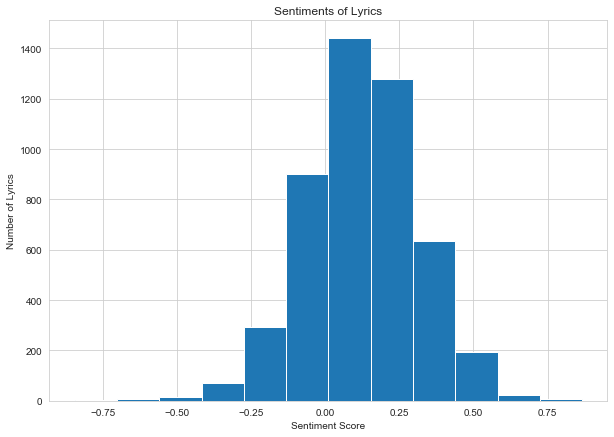

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 7))

# polarity histogram
df_sentiment.hist(bins=12,ax=ax)

plt.title("Sentiments of Lyrics")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Lyrics")
plt.show()

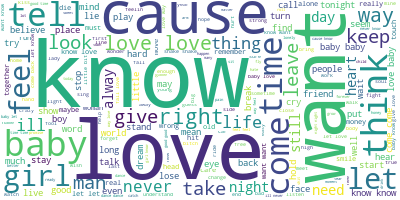

In [28]:
from wordcloud import WordCloud
long_string = ','.join(list(df.clean))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [29]:
df_sentiment.sort_values(by=['polarity']).head()

,polarity,clean_lyric
3169,-0.844619,hot summer street pavement burn sit around t...
255,-0.800000,every town street name street funky funky br...
1832,-0.797044,hot summer street pavement burn sit around t...
2011,-0.742756,gimme beatsittin movie show thinkin nasty th...
395,-0.675000,bad moon arise trouble way earthquake lightn...


In [30]:
df_sentiment.sort_values(by=['polarity'],ascending=False).head()

,polarity,clean_lyric
982,0.866667,beautiful beautiful everything hope everythi...
3009,0.800713,oh yeah oh yeah oh yeah oh yeahit beautiful ...
1026,0.800000,fly robin fly fly robin fly fly robin fly sk...
231,0.781818,would like ride beautiful balloon would like g...
455,0.771146,oh happy day oh happy day oh happy day oh happ...
